In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
# from skimage.color import rgb2grey
from skimage import exposure
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
import cv2


In [2]:
import os
import shutil

# # Step 1: Copy the dataset to a writable directory
# input_dir = "/kaggle/input/cv-project-dataset/Project Data"
# working_dir = "/kaggle/working/cv-project-dataset"

# if not os.path.exists(working_dir):
#     shutil.copytree(input_dir, working_dir)
#     print(f"Dataset copied to: {working_dir}")

# # Step 2: Remove placeholder files in the writable directory
# for dirpath, dirnames, filenames in os.walk(working_dir):
#     for file in filenames:
#         if file == "New Text Document.txt":  # Replace with your placeholder filename
#             file_path = os.path.join(dirpath, file)
#             os.remove(file_path)  # Delete the file
#             print(f"Deleted: {file_path}")

# print("All placeholder files have been deleted!")


In [3]:
# from pathlib import Path
# dataset_dir = Path(r'/kaggle/working/cv-project-dataset')


In [4]:
train_dir = r'/kaggle/working/cv-project-dataset/Train/images'
val_dir = r'/kaggle/working/cv-project-dataset/Val/images'

# print(f"Train Directory : {train_dir}")
# print(f"Validation Directory : {val_dir}")


In [5]:
# total_class_train = len(os.listdir(train_dir))
# total_class_val = len(os.listdir(val_dir))


# print(f"Total of Train Data Classes: {total_class_train} classes")
# print(f"Total of Validation Data Classes: {total_class_val} classes")


In [6]:
# all_diseases = sorted(os.listdir(train_dir))

# plants = []
# for cls in all_diseases:
#     plant = cls.split("___")[0]
#     if plant not in plants:
#         plants.append(plant)

# num_plants = len(plants)
# print(f"Number of Plants: {num_plants} plants")
# print("Kind of Plants: ")
# for i, plant in enumerate(plants):
#     print(f"{i+1}. {plant}")

# diseases = []
# for cls in all_diseases:
#     disease = cls.split("___")[1]
#     if disease not in diseases:
#         if disease != "healthy":
#             diseases.append(cls)
    
# num_diseases = len(diseases)
# print(f"\nNumber of Diseases: {num_diseases} diseases")
# print("Kind of Diseases: ")
# for i, disease in enumerate(diseases):
#     print(f"{i+1}. {disease}")




In [7]:
# import os
# import shutil

# # Define the directories
# val_dir = r"/kaggle/working/cv-project-dataset/Train/images"  # Validation directory
# output_dir = r"/kaggle/working/cv-project-dataset/out_train"  # Output directory

# # Ensure the output directory exists
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Get the list of all disease classes
# all_diseases = sorted(os.listdir(val_dir))

# # Print all disease classes
# # print(all_diseases)

# # Rename and copy images
# for cls in all_diseases:
#     if "___" in cls:  # Ensure the folder name has the expected format
#         plant, disease = cls.split("___")
#         class_path = os.path.join(val_dir, cls)
#         if os.path.isdir(class_path):  # Check if it's a folder
#             for i, image_file in enumerate(os.listdir(class_path)):
#                 src_path = os.path.join(class_path, image_file)
#                 if os.path.isfile(src_path):  # Ensure it's a file
#                     # Set an initial name for the image
#                     new_name = f"{plant}_{i+1}.jpg"  # E.g., Apple_1.jpg, Tomato_1.jpg
#                     dst_path = os.path.join(output_dir, new_name)

#                     # Check if the file already exists, and if so, increment the number
#                     counter = 1
#                     while os.path.exists(dst_path):
#                         # Increment the number until a unique filename is found
#                         new_name = f"{plant}_{counter}.jpg"
#                         dst_path = os.path.join(output_dir, new_name)
#                         counter += 1
#                     print(new_name)
#                     # Copy and rename the image
#                     shutil.copy(src_path, dst_path)

# # print(f"\nAll images have been renamed based on their class (plant name) and copied to: {output_dir}")


In [8]:
# # Output directory


# # Initialize a list to store image-label pairs
# train_data = []

# target_size = (224, 224) 
# # Loop through files in the folder
# # Loop through files in the folder in sorted order
# for file_name in sorted(os.listdir(folder_path)):
#     if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Check file extensions
#         file_path = os.path.join(folder_path, file_name)  # Full path to the file
#         image = cv2.imread(file_path)  # Read the image

#         if image is not None:
#             # Optional: Convert to grayscale if needed
#             image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image_resized = cv2.resize(image_rgb, target_size)

#             # Apply sharpening filter
#             kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#             sharpened_image = cv2.filter2D(image_resized, -1, kernel)

#             # Extract label (part before '_')
#             label = file_name
#             # print(label)
            
#             # Append the image and label as a tuple to the data list
#             train_data.append((sharpened_image, label))






In [9]:
train_dir ='/kaggle/input/cv-project-dataset/Project Data/Train/images'
val_dir = '/kaggle/input/cv-project-dataset/Project Data/Val/images'

In [10]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np

# import os
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Preprocess function
# def preprocess_new_image(image_path, target_size=(224, 224)):
#     """
#     Preprocess the image to prepare it for the model.
#     Args:
#         image_path (str): Path to the image file.
#         target_size (tuple): Target size for resizing the image.
#     Returns:
#         np.array: Preprocessed image.
#     """
#     # Load the image with the specified target size
#     image = load_img(image_path, target_size=target_size)

#     # Convert the PIL image to a NumPy array
#     image_array = img_to_array(image)

#     # Apply sharpening filter
#     kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
#     sharpened_image = cv2.filter2D(image_array, -1, kernel)

#     # Normalize pixel values to [0, 1]
#     # sharpened_image = sharpened_image / 255.0

#     return sharpened_image




In [11]:
import os
import numpy as np

def preprocess_new_image(img_path):
    # Example image preprocessing (replace this with your actual preprocessing logic)
    import cv2
    image = cv2.imread(img_path)
    image = cv2.resize(image, (224, 224))  # Resize to a fixed size
    # Normalize pixel values to [0, 1]
    # image = image / 255.0
    # Apply sharpening filter
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])  # Sharpening kernel
    sharpened_image = cv2.filter2D(image, -1, kernel)
    sharpened_image=sharpened_image/ 255.0
    return sharpened_image

def load_images(folder_path):
    all_diseases = sorted(os.listdir(folder_path))
    data_list = []  # Initialize the list to store (image, label) tuples
    
    for class_label in all_diseases:
        class_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_path):  # Check if it's a folder
            # Extract plant name from the folder name
            if "___" in class_label:
                plant_name = class_label.split("___")[0]
                # print(class_label)
            else:
                print(f"Warning: Unexpected folder name format: {class_label}")
                continue

            # Process each image in the folder
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                
                # Validate file extensions (e.g., .jpg, .png)
                valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")
                if not filename.lower().endswith(valid_extensions):
                    continue
                # print(plant_name)
                # Preprocess the image
                img_array = preprocess_new_image(img_path)
                
                # Append (image, label) tuple to the list
                data_list.append((img_array, plant_name))
                
    
    # Return the list of (image, label) tuples
    return data_list


# Example Usage
# train_dir = train_dir  # Update this path
train_data = load_images(train_dir)















# def load_images(folder_path):
#     all_diseases = sorted(os.listdir(folder_path))
#     list=[]
#     for class_label in all_diseases:
#         class_path = os.path.join(folder_path, class_label)
#         if os.path.isdir(class_path):
#             for filename in os.listdir(class_path):
#                 img_path = os.path.join(class_path, filename)
#                 img_array = preprocess_new_image(img_path)# Assume this function processes the image correctly
#                 # image_uint8 = (img_array * 255).astype(np.uint8)
#                 # image_rgb = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
#                 # plt.imshow(image_rgb)
#                 # plt.axis("off")
#                 # plt.show()

#                 print(class_label)
#                 class_label = class_label.split("___")[0]  # Assuming labels are embedded in folder names

#                 print(class_label)
#                 list.append((img_array,class_label))
#     return list

# train_data=load_images(train_dir)





# index =  5# Change this to select a different image
# image, label = train_data[index]

# # Print the label
# print(f"Label: {label}")

# # Display the image using Matplotlib
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
# plt.imshow(image_rgb)
# plt.title(f"Image Label: {label}")
# plt.axis("off")
# plt.show()

In [12]:
# validation_data=[]
val_data= load_images(val_dir)
# validation_data.append([val_data , val_label])

Label: Cherry_(including_sour)


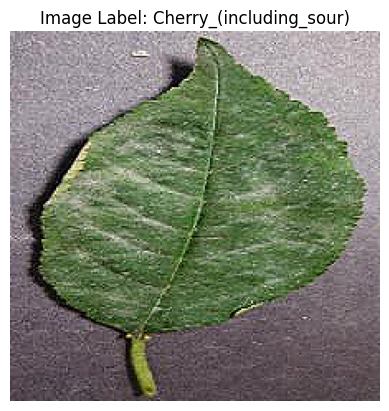

In [13]:

index = 166 # Change this to select a different image
image, label = train_data[index]

# Print the label
print(f"Label: {label}")

# Display the image using Matplotlib
# Display the image using Matplotlib
image_uint8 = (image * 255).astype(np.uint8)  # Convert to uint8
image_rgb = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
plt.imshow(image_rgb)
plt.title(f"Image Label: {label}")
plt.axis("off")
plt.show()


In [14]:
# import os
# import shutil

# # Define the directories
# val_dir = r"/kaggle/working/cv-project-dataset/Val/images"  # Validation directory
# output_dir = r"/kaggle/working/cv-project-dataset/out_val"  # Output directory

# # Ensure the output directory exists
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Get the list of all disease classes
# all_diseases = sorted(os.listdir(val_dir))

# # Print all disease classes
# print(all_diseases)

# # Rename and copy images
# for cls in all_diseases:
#     if "___" in cls:  # Ensure the folder name has the expected format
#         plant, disease = cls.split("___")
#         class_path = os.path.join(val_dir, cls)
#         if os.path.isdir(class_path):  # Check if it's a folder
#             for i, image_file in enumerate(os.listdir(class_path)):
#                 src_path = os.path.join(class_path, image_file)
#                 if os.path.isfile(src_path):  # Ensure it's a file
#                     # Set an initial name for the image
#                     new_name = f"{plant}_{i+1}.jpg"  # E.g., Apple_1.jpg, Tomato_1.jpg
#                     dst_path = os.path.join(output_dir, new_name)

#                     # Check if the file already exists, and if so, increment the number
#                     counter = 1
#                     while os.path.exists(dst_path):
#                         # Increment the number until a unique filename is found
#                         new_name = f"{plant}_{counter}.jpg"
#                         dst_path = os.path.join(output_dir, new_name)
#                         counter += 1
                    
#                     # Copy and rename the image
#                     shutil.copy(src_path, dst_path)

# print(f"\nAll images have been renamed based on their class (plant name) and copied to: {output_dir}")


In [15]:
# folder_path = r"/kaggle/working/cv-project-dataset/out_val"

# # Initialize a list to store image-label pairs
# val_data = []

# target_size = (224, 224) 
# # Loop through files in the folder
# # Loop through files in the folder in sorted order
# for file_name in sorted(os.listdir(folder_path)):
#     if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Check file extensions
#         file_path = os.path.join(folder_path, file_name)  # Full path to the file
#         image = cv2.imread(file_path)  # Read the image

#         if image is not None:
#             # Optional: Convert to grayscale if needed
#             image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image_resized = cv2.resize(image_rgb, target_size)

#             # Apply sharpening filter
#             kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#             sharpened_image = cv2.filter2D(image_resized, -1, kernel)

#             # Extract label (part before '_')
#             label = file_name.split('_')[0]
#             # print(label)
            
#             # Append the image and label as a tuple to the data list
#             val_data.append((sharpened_image, label))



Label: Apple


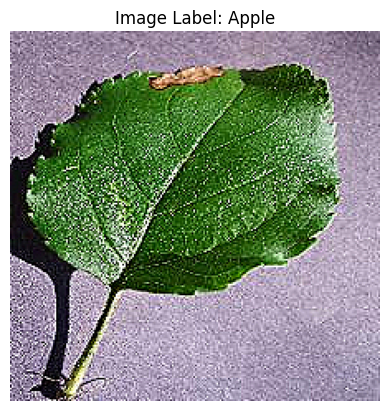

In [16]:

index =  15# Change this to select a different image
image, label = val_data[index]

# Print the label
print(f"Label: {label}")

# Display the image using Matplotlib
  # Convert to uint8
image_uint8 = (image * 255).astype(np.uint8)
image_rgb = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
plt.imshow(image_rgb)
plt.title(f"Image Label: {label}")
plt.axis("off")
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,ResNet101
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
# tf.keras.backend.clear_session()
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model's layers (to retain pre-trained weights)
# base_model.trainable = False

In [19]:
def preprocess_data(data, target_size=(224, 224), class_mapping=None):
    processed_images = []
    processed_labels = []

    # Iterate over the dataset to resize images and handle labels
    for item in data:
        image, label = item  # Unpack the tuple

        # Resize image to the target size
        resized_image = tf.image.resize(image, target_size).numpy()
        processed_images.append(resized_image)

        # Map string label to integer using the class_mapping
        if class_mapping is not None:
            if label not in class_mapping:
                raise ValueError(f"Label '{label}' not found in class_mapping.")
            processed_labels.append(class_mapping[label])
        else:
            processed_labels.append(label)

    # Convert images and labels to numpy arrays
    images = np.array(processed_images)
    labels = np.array(processed_labels)
    
    return images, labels


In [20]:
# Define your class mapping
class_mapping = {
    "Apple": 0,
    "Cherry_(including_sour)": 1,
    "Corn_(maize)": 2,
    "Grape": 3,
    "Peach": 4,
    "Pepper,_bell": 5,
    "Potato": 6,
    "Strawberry": 7,
    "Tomato": 8
}


# Preprocess the training and validation data
train_images, train_labels = preprocess_data(train_data, target_size=(224, 224), class_mapping=class_mapping)
val_images, val_labels = preprocess_data(val_data, target_size=(224, 224), class_mapping=class_mapping)
print(np.unique(train_labels))




# Create tf.data.Dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32).shuffle(100)
# val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32)


[0 1 2 3 4 5 6 7 8]


In [21]:
# tf.keras.backend.clear_session()
# base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model's layers (to retain pre-trained weights)
# # base_model.trainable = False

# from tensorflow.keras.optimizers import RMSprop

# for i in range(len(base_model.layers)-27):
#         base_model.layers[i].trainable = False

# model = tf.keras.Sequential([
#     base_model,
#     # tf.ker
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     # tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(9, activation='softmax')
# ])


# model.compile(optimizer=Adam(0.0001), 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])

# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Define your classes and labels
# classes = np.unique(train_labels)  # y_train is your training labels
# class_weights = compute_class_weight(class_weight='balanced', classes=classes,y=train_labels)

# # Convert to dictionary format (required for most ML frameworks)
# class_weights_dict = dict(enumerate(class_weights))
# print("Class weights:", class_weights_dict)

# model.fit(
#     train_images, train_labels,
#     epochs=20, 
#     batch_size=32, 
#     validation_data=(val_images, val_labels),
#     class_weight=class_weights_dict
# )

In [22]:
tf.keras.backend.clear_session()
from tensorflow.keras.applications import VGG16,MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD

# Load the base model without the top fully connected layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(9, activation='softmax')(x)  # Output layer for 10 classes

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary
# model.summary()


from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define your classes and labels
classes = np.unique(train_labels)  # y_train is your training labels
class_weights = compute_class_weight(class_weight='balanced', classes=classes,y=train_labels)

# Convert to dictionary format (required for most ML frameworks)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

model.fit(
    train_images, train_labels,
    epochs=20, 
    batch_size=16, 
    validation_data=(val_images, val_labels),
    class_weight=class_weights_dict
)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Class weights: {0: 0.9166666666666666, 1: 1.8333333333333333, 2: 0.9166666666666666, 3: 0.9166666666666666, 4: 1.8333333333333333, 5: 1.8333333333333333, 6: 1.2222222222222223, 7: 1.8333333333333333, 8: 0.36666666666666664}
Epoch 1/20


I0000 00:00:1734290471.233623      68 service.cc:145] XLA service 0x7b961c0021d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734290471.233676      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


13/83 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1157 - loss: 2.3692

I0000 00:00:1734290474.091622      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.4119 - loss: 1.6576 - val_accuracy: 0.9121 - val_loss: 0.4282
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9301 - loss: 0.3451 - val_accuracy: 0.9182 - val_loss: 0.3084
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9702 - loss: 0.1947 - val_accuracy: 0.9364 - val_loss: 0.2309
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9836 - loss: 0.1317 - val_accuracy: 0.9455 - val_loss: 0.2009
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9898 - loss: 0.0989 - val_accuracy: 0.9515 - val_loss: 0.1900
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9838 - loss: 0.0989 - val_accuracy: 0.9485 - val_loss: 0.1775
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9922 - loss: 0.0704 - val_accuracy: 0.9485 - val_loss: 0.1672
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9934 - loss: 0.0588 - val_accuracy: 0.9576 - val_loss: 0

In [23]:
model.save("/kaggle/working/resnet50_saved_model.h5")



In [24]:
def evaluate_classwise(model, test_dataset, num_classes):
    # Initialize counters for matches and mismatches per class
    class_matches = np.zeros(num_classes, dtype=int)
    class_mismatches = np.zeros(num_classes, dtype=int)
    total_predictions_per_class = np.zeros(num_classes, dtype=int)

    # Iterate through the dataset
    for images, labels in test_dataset:
        # Get model predictions
        predicted_probs = model.predict(images)  # Shape: (batch_size, num_classes)
        predicted_labels = np.argmax(predicted_probs, axis=1)  # Shape: (batch_size,)
        
        # Ensure labels are in NumPy format
        labels = labels.numpy()  # Convert integer-encoded labels to NumPy array

        # Calculate matches and mismatches for each class
        for i in range(num_classes):
            class_mask = (labels == i)  # True for images of class i
            total_predictions_per_class[i] += np.sum(class_mask)  # Count of true class i samples
            class_matches[i] += np.sum(class_mask & (predicted_labels == i))  # Matches for class i
            class_mismatches[i] += np.sum(class_mask & (predicted_labels != i))  # Mismatches for class i

    # Calculate match and mismatch percentages per class
    class_match_percentage = (class_matches / total_predictions_per_class) * 100
    class_mismatch_percentage = (class_mismatches / total_predictions_per_class) * 100

    return class_match_percentage, class_mismatch_percentage


In [25]:
# model= tf.keras.Sequential([
#      tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
#      tf.keras.layers.MaxPooling2D(2,2),
#      tf.keras.layers.BatchNormalization(),
#      tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
#      tf.keras.layers.AveragePooling2D(3,3),

#      tf.keras.layers.Flatten(),

#      tf.keras.layers.Dense(128,activation='relu'),

#      tf.keras.layers.Dense(9,activation='softmax')

    
    
#  ])

In [26]:
#  model.compile(optimizer='SGD',
#                loss='binary_crossentropy',
#                metrics=['accuracy'])
# # Continue training
# history = model.fit(train_dataset, 
#                     validation_data=val_dataset, 
#                     epochs=30, 
#                     batch_size=32)

In [27]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np

# def preprocess_new_image(image_path, target_size=(224, 224)):
#     """
#     Preprocess the image to prepare it for the model.
#     Args:
#         image_path (str): Path to the new image.
#         target_size (tuple): Target size to resize the image.
#     Returns:
#         np.array: Preprocessed image.
#     """
#     # Load the image
#     image = load_img(image_path, target_size=target_size)

    
    

#     # Apply sharpening filter
#     image = load_img(image_path, target_size=target_size)
    
#     # Convert the PIL image to a NumPy array
#     image_array = img_to_array(image)
    
#     # Optional: Apply sharpening using OpenCV
#     kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#     sharpened_image = cv2.filter2D(image_array.astype(np.uint8), -1, kernel)
    
#     # Scale pixel values to [0, 1]
    
    
    
#     image_array = np.expand_dims(image_array, axis=0)
    
#     return image_array


In [28]:
# def predict_new_image(model, image_path, class_mapping):
#     """
#     Predict the class of a new image using the trained model.
#     Args:
#         model (tf.keras.Model): Trained model.
#         image_path (str): Path to the new image.
#         class_mapping (dict): Mapping from class indices to class names.
#     Returns:
#         str: Predicted class name.
#     """
#     # Preprocess the image
#     preprocessed_image = preprocess_new_image(image_path)
    
#     # Get predictions from the model
#     predicted_probs = model.predict(preprocessed_image)

#     print(predicted_probs)
    
#     # Get the index of the class with the highest probability
#     predicted_class_index = np.argmax(predicted_probs, axis=1)[0]

#     print(predicted_class_index)
    
#     # Map the index to the class name
#     predicted_class_name = class_mapping.get(predicted_class_index, "Unknown")
    
#     return predicted_class_name


In [29]:
# # Define your class mapping
# class_mapping = {
#     0: "Apple",
#     1: "Cherry",
#     2: "Corn",
#     3: "Grape",
#     4: "Peach",
#     5: "Pepper",
#     6: "Potato",
#     7: "Strawberry",
#     8: "Tomato"
# }


# # Path to the new image
# new_image_path = "/kaggle/input/cv-project-dataset/Project Data/Val/images/Corn_(maize)___Northern_Leaf_Blight/97bb609b-99f9-4dd8-9468-cb24cb17bf7c___RS_NLB 3497.JPG"
# # Predict the class
# predicted_class = predict_new_image(model, new_image_path, class_mapping)

# print(f"Predicted Class: {predicted_class}")


In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np

def preprocess_new_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image to prepare it for the model.
    Args:
        image_path (str): Path to the new image.
        target_size (tuple): Target size to resize the image.
    Returns:
        np.array: Preprocessed image.
    """
    # Load and resize the image
    image = load_img(image_path, target_size=target_size)
    
    # Convert the PIL image to a NumPy array
    image_array = img_to_array(image)  # Shape: (224, 224, 3)
    
    # Apply sharpening filter using OpenCV
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]]) 
    sharpened_image = cv2.filter2D(image_array.astype(np.uint8), -1, kernel)
    
    # Normalize pixel values to [0, 1]
    sharpened_image = sharpened_image / 255.0
    
    # Expand dimensions to match model input shape: (1, 224, 224, 3)
    preprocessed_image = np.expand_dims(sharpened_image, axis=0)
    
    return preprocessed_image


In [31]:
from sklearn.metrics import accuracy_score
import numpy as np
import os

def load_images(folder_path):
    all_diseases = sorted(os.listdir(folder_path))
    images = []
    labels = []
    for class_label in all_diseases:
        class_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                img_array = preprocess_new_image(img_path)  # Assume this function processes the image correctly
                class_label = class_label.split("___")[0]  # Assuming labels are embedded in folder names

                images.append(img_array)
                labels.append(class_label)
    return np.vstack(images), np.array(labels)

In [32]:
# Load test data
X_test, y_test = load_images('/kaggle/input/cv-project-dataset/Project Data/Val/images')

# Predict using the model
y_pred_label = model.predict(X_test)  # Assuming model is preloaded and trained

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step


In [33]:
# Map predicted numeric labels to class names if needed

class_mapping = {
    0: "Apple",
    1: "Cherry_(including_sour)",
    2: "Corn_(maize)",
    3: "Grape",
    4: "Peach",
    5: "Pepper,_bell",
    6: "Potato",
    7: "Strawberry",
    8: "Tomato"
}
if hasattr(model, "classes"):  # Some sklearn models have classes_ attribute
    ypred = [model.classes[np.argmax(pred)] for pred in y_pred_label]
else:
    y_pred = [class_mapping.get(np.argmax(pred), "Unknown") for pred in y_pred_label]

In [34]:
# Ensure y_test and y_pred are comparable
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Calculate accuracy
for i in range(len(y_test)):

    print(f"y_test : {y_test[i]} , y_pred : {y_pred[i]}" )

# print("y_pred (label) :" ,y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc * 100)

y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Tomato
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Cherry_(including_sour)
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pred : Apple
y_test : Apple , y_pr